# Portfolio Optimization

### BUSI 721: Data-Driven Finance I
### Kerry Back, Rice University

### Outline

1. Review of portfolio expected returns and risks
2. Define mean-variance efficient and global minimum variance portfolios
3. Example of quadratic programming with cvxopt
4. SPY, IEF, and GLD returns
5. GMV portfolio of SPY, IEF, and GLD
6. Mean-variance efficient portfolios of SPY, IEF, and GLD
7. Include cash with SPY, IEF, and GLD
8. Sharpe ratios and the tangency portfolio

### Review: Portfolio expected return

- With $n$ risky assets,
$$ \sum_{i=1}^n w_i \mu_i + \left(1-\sum_{i=1}^n w_i\right)r_f$$
- where $r_f=$ money market rate if $\sum w_i < 1$ and
- $r_f = $ margin loan rate if $\sum w_i > 1$ and
- we are ignoring interest drag and short borrowing fee if any of the $w_i$ are negative.

### Review: Reg T

- Initial margin requirement: when positions are put on, 
$$\sum |w_i| \le 2$$
- Afterwards, brokers impose maintenance margin requirements.
- Example: invest 1,000, borrow 1,000, buy 20 shares of $\text{\$}$ 100 stock
  - $\sum w_i = 2$
  - Stock price falls to 75.  
  - Now have 1,500 of stock.  
  - Portfolio value is 1,500 - 1,000 = 500. Weight on stock is 1,500 / 500 = 3.
  - Maybe get margin call.

### Review: Portfolio variance

- Two assets:
$$w_1^2 \sigma_1^2 + w_2^2\sigma_2^2 + 2w_1w_2\rho\sigma_1\sigma_2$$
- Three assets:
$$w_1^2 \sigma_1^2 + w_2^2\sigma_2^2 + w_3^2\sigma_3^2$$
$$ + 2w_1w_2\rho_{12}\sigma_1\sigma_2  + 2w_1w_3\rho_{13}\sigma_1\sigma_3  + 2w_2w_3\rho_{23}\sigma_2\sigma_3$$
- Any number of assets:
$$w'\Sigma w$$

### Matrix multiplication

$$\begin{pmatrix} a & b\\c & d \end{pmatrix}
\begin{pmatrix}x \\y \end{pmatrix} = 
\begin{pmatrix}ax + by \\cx + dy \end{pmatrix}$$

$$\begin{pmatrix} g & h \end{pmatrix}
\begin{pmatrix} a & b\\c & d \end{pmatrix} = 
\begin{pmatrix} ga + hc & gb + hd \end{pmatrix}$$

$$\begin{pmatrix} w_1 & w_2 \end{pmatrix} 
\begin{pmatrix} \sigma_1^2 & \rho_{12}\sigma_1\sigma_2 \\
\rho_{12}\sigma_1\sigma_2 & \sigma_2^2 \end{pmatrix}
\begin{pmatrix} w_1 \\ w_2 \end{pmatrix} = 
\begin{pmatrix} w_1 & w_2 \end{pmatrix}
\begin{pmatrix} \sigma_1^2w_1 + \rho\sigma_1\sigma_2 w_2 \\
\rho\sigma_1\sigma_2 w_1 + \sigma_2w_2 \end{pmatrix}$$
$$ = \sigma_1^2w_1^2 + \rho\sigma_2\sigma_2w_1w_2 + \rho\sigma_2\sigma_2w_1w_2 + \sigma_2w_2^2$$


## 2. Mean-Variance Frontier and GMV Portfolio

### Mean-Variance Frontier

- Mean-variance frontier is the set of portfolios that have the least risk among all portfolios that have their expected return
- Minimum risk problem: minimize variance subject to constraints:
  - achieve a target expected return 
  - $\sum w_i = 1$
  - possibly $w_i \ge 0$ or Reg T
- We can vary the target expected return and trace out the mean-variance frontier
- Some points on the frontier may be inefficient (meaning you can do better on both risk and expected return) because the target expected return is too low.

### Global minimum variance portfolio

- Solve the minimization problem without a target expected return
- This portfolio (GMV portfolio) has the least risk among all portfolios
- Frontier portfolios are efficient (meaning  you can't do better on both risk and expected return) if and only if the target expected return $\ge $ expected return of GMV portfolio.

## 3. Quadratic programming



- Finding efficient portfolios and finding the GMV portfolio are examples of quadratic programming
- Minimize or maximize a quadratic function (squares and products and linear terms)
  - Subject to linear inequality constraints
  - And subject to linear equality constraints

### Quadratic Programming Example

minimize

$$x_1^2 + x_2^2 - 2x_1 - x_2$$ 

subject to 

$$x_1 \ge 0$$ 
$$x_2 \ge 0$$
$$x_1+x_2=1$$

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import numpy as np

a = np.linspace(0, 2, 50)
b = np.linspace(0, 2, 50)

A, B = np.meshgrid(a, b)
C = A**2 + B**2 - 2*A - B

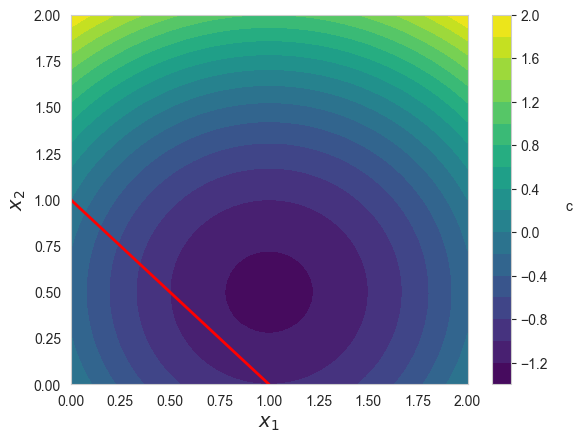

In [2]:
fig, ax = plt.subplots()
contour = ax.contourf(A, B, C, 20, cmap='viridis')
cbar = plt.colorbar(contour, ax=ax)
cbar.set_label('c', rotation=0, labelpad=15)
ax.set_xlabel(r'$x_1$', fontdict={"size": 14})
ax.set_ylabel(r'$x_2$', fontdict={"size": 14})
ax.plot(np.linspace(0, 1, 20), np.linspace(1, 0, 20), c="red", lw=2)
plt.savefig("images/10-qp.jpeg")

![](images/10-qp.jpeg)

### Notation of cvxopt

minimize
$$\frac{1}{2} x'Px + q'x$$
subject to 
$$Gx \le h$$
and
$$Ax=b$$

### Our example

$$P = \begin{pmatrix}  2 & 0 \\ 0 & 2 \end{pmatrix} \quad \Rightarrow \quad \frac{1}{2} x'Px = x_1^2 + x_2^2$$
$$ q = \begin{pmatrix} - 2 \\ - 1 \end{pmatrix}\quad\Rightarrow\quad q'x = -2 x_1 - x_2$$
$$G =\begin{pmatrix}  -1 & 0 \\ 0 & -1 \end{pmatrix}\quad\Rightarrow\quad Gx = \begin{pmatrix} -x_1 \\ -x_2 \end{pmatrix}$$
$$h= \begin{pmatrix} 0 \\ 0 \end{pmatrix}$$
$$A = \begin{pmatrix} 1 & 1 \end{pmatrix}\quad\Rightarrow\quad Ax = x_1 + x_2$$
$$b = \begin{pmatrix} 1 \end{pmatrix}$$

### Define arrays

In [3]:
P = np.array(
    [
        [2., 0.],
        [0., 2.]
    ]
)
q = np.array([-2., -1.]).reshape(2, 1)
G = np.array(
    [
        [-1., 0.],
        [0., -1.]
    ]
)
h = np.array([0., 0.]).reshape(2, 1)
A = np.array([1., 1.]).reshape(1, 2)
b = np.array([1.]).reshape(1, 1)

### Solve

In [4]:
from cvxopt import matrix
from cvxopt.solvers import qp

sol = qp(
    P=matrix(P),
    q=matrix(q),
    G=matrix(G),
    h=matrix(h),
    A=matrix(A),
    b=matrix(b)
)
np.array(sol["x"])

     pcost       dcost       gap    pres   dres
 0: -1.1111e+00 -2.2222e+00  1e+00  1e-16  1e+00
 1: -1.1231e+00 -1.1680e+00  4e-02  1e-16  4e-02
 2: -1.1250e+00 -1.1261e+00  1e-03  2e-16  3e-04
 3: -1.1250e+00 -1.1250e+00  1e-05  6e-17  3e-06
 4: -1.1250e+00 -1.1250e+00  1e-07  3e-16  3e-08
Optimal solution found.


array([[0.7499999],
       [0.2500001]])

## 4. Stock, Bond, and Gold ETFs

- SPY, IEF, and GLD adjusted closing prices from Yahoo
- Downsample to monthly
- Percent changes are monthly returns
- Compute historical means and covariance matrix

In [5]:
import yfinance as yf

tickers = ["SPY", "IEF", "GLD"]
prices = yf.download(tickers, start="1970-01-01")["Adj Close"]
prices = prices.resample("M").last()
rets = prices.pct_change().dropna()
rets.head(3)

[*********************100%%**********************]  3 of 3 completed


,GLD,IEF,SPY
Date,,,
2004-12-31,-0.029255,0.011674,0.030121
2005-01-31,-0.036073,0.008710,-0.022421
2005-02-28,0.031028,-0.013683,0.020904


### Means, risks and correlations

In [6]:
12 * rets.mean()

GLD    0.087096
IEF    0.031683
SPY    0.100341
dtype: float64

In [7]:
np.sqrt(12) * rets.std()

GLD    0.169435
IEF    0.064872
SPY    0.150749
dtype: float64

In [8]:
rets.corr()

,GLD,IEF,SPY
GLD,1.000000,0.317975,0.084318
IEF,0.317975,1.000000,-0.121379
SPY,0.084318,-0.121379,1.000000


In [9]:
mu = rets.mean().to_numpy()
Sigma = rets.cov().to_numpy()

## 5. GMV Portfolio of Stocks, Bonds, and Gold

### GMV minimization problem

minimize

$$\frac{1}{2} w'\Sigma w$$

subject to

$$\sum w_i = 1 \quad \Leftrightarrow \quad \iota'w = 1$$

where $\iota$ is a column vector of ones.

### cvxopt formulation

- $P=\Sigma$
- $q=0$

$$A = \begin{pmatrix}  1 & 1 & 1 \end{pmatrix}$$
$$ b = \begin{pmatrix} 1 \end{pmatrix}$$


### Define arrays

In [10]:
P = Sigma
q = np.zeros((3, 1))
A = np.ones((1, 3))
b = np.ones((1, 1))

### Compute the GMV portfolio

In [11]:
sol = qp(
    P=matrix(P),
    q=matrix(q),
    A=matrix(A),
    b=matrix(b)
)

import pandas as pd
gmv = pd.Series(sol["x"], index=rets.columns)
gmv

GLD   -0.001301
IEF    0.817025
SPY    0.184276
dtype: float64

### Risk and expected return of GMV portfolio

In [12]:
w = gmv.to_numpy()
print(f"\nGMV annualized std dev is {np.sqrt(12*w@Sigma@w):.2%}")
print(f"GMV annualized mean is {12*mu@w: .2%}")

print(f"\nIEF annualized std dev is {np.sqrt(12)*rets.IEF.std():.2%}")
print(f"IEF annualized mean is {12*rets.IEF.mean():.2%}")


GMV annualized std dev is 5.67%
GMV annualized mean is  4.43%

IEF annualized std dev is 6.49%
IEF annualized mean is 3.17%


In [13]:
#!pip install kaleido==0.1.0post1

import plotly.graph_objects as go

trace1 = go.Scatter(
    x=np.sqrt(12)*rets.std(),
    y=12*rets.mean(),
    mode="markers",
    text=rets.columns.to_list(),
    marker_size=15,
    hovertemplate="%{text}<extra></extra>",
    name = "GLD, IEF, and SPY"
    )
fig = go.Figure(trace1)
trace2 = go.Scatter(
    x=[np.sqrt(12*w@Sigma@w)],
    y=[12*w@mu],
    text=["GMV Portfolio"],
    mode="markers",
    marker_size=15,
    hovertemplate="%{text}<extra></extra>",
    name="GMV Portfolio"
)
fig.add_trace(trace2)
fig.update_layout(
    xaxis_title="Standard Deviation",
    yaxis_title="Expected Return",
    xaxis_rangemode="tozero",
    yaxis_rangemode="tozero",
    yaxis_tickformat=".0%",
    template="plotly_white",
    legend=dict(
        x=0.01,
        xanchor="left",
        y=0.99,
        yanchor="top"
    )
) 
fig.write_image("images/10-mv1.jpeg")

![](images/10-mv1.jpeg)

## 6. Efficient portfolios of SPY, IEF, and GLD

### Minimize risk with target expected return

minimize

$$\frac{1}{2} w'\Sigma w$$

subject to

$$\mu'w = r$$
$$\iota'w = 1$$

where $r=$ target expected return and $\iota$ is a column vector of ones.

### cvxopt formulation

- $P=\Sigma$
- $q=0$

$$A = \begin{pmatrix} \mu_1 & \mu_2 & \mu_3 \\ 1 & 1 & 1 \end{pmatrix}$$
$$ b = \begin{pmatrix} r \\ 1 \end{pmatrix}$$


### Define arrays

In [14]:
# example target monthly expected return
r = 0.06/12

P = Sigma
q = np.zeros((3, 1))
A = np.array(
    [
        mu,
        [1., 1., 1.]
    ]
)
b = np.array([r, 1]).reshape(2, 1)

### Compute the efficient portfolio

In [15]:
sol = qp(
    P=matrix(P),
    q=matrix(q),
    A=matrix(A),
    b=matrix(b)
)
efficient = pd.Series(sol["x"], index=rets.columns)
efficient

GLD    0.115466
IEF    0.565289
SPY    0.319245
dtype: float64

In [16]:
w = efficient.to_numpy()
trace3 = go.Scatter(
    x=[np.sqrt(12*w@Sigma@w)],
    y=[12*w@mu],
    text=["Frontier Portfolio"],
    mode="markers",
    marker_size=15,
    hovertemplate="%{text}<extra></extra>",
    name="Efficient Portfolio"
)
fig.add_trace(trace3)
fig.write_image("images/10-mv2.jpeg")

![](images/10-mv2.jpeg)

## 7. Include cash with SPY, IEF, and GLD

### Target expected return with cash

- Expected return is 
$$\mu'w + (1-\iota'w)r_f = r_f + (\mu-r_f\iota')w$$
- Equals target expected return $r$ if and only if
$$(\mu-r_f\iota)'w = r-r_f$$
- So,
$$A = \begin{pmatrix} \mu_1-r_f & \mu_2-r_f & \mu_3-r_f \end{pmatrix}$$
$$b = \begin{pmatrix} r-r_f \end{pmatrix}$$

### Define arrays

In [17]:
# example monthly interest rate
rf = 0.03/12

# example target expected return
r = 0.06/12

P = Sigma
q = np.zeros((3, 1))
A = (mu - rf*np.ones(3)).reshape(1, 3)
b = np.array([r-rf]).reshape(1, 1)

### Compute the efficient portfolio

In [18]:
sol = qp(
    P=matrix(P),
    q=matrix(q),
    A=matrix(A),
    b=matrix(b)
)
efficient_with_cash = pd.Series(sol["x"], index=rets.columns)
efficient_with_cash

GLD    0.176189
IEF   -0.027139
SPY    0.284129
dtype: float64

In [19]:
w = efficient_with_cash.to_numpy()
trace4 = go.Scatter(
    x=[np.sqrt(12*w@Sigma@w)],
    y=[12*(rf+(mu-rf*np.ones(3)) @ w)],
    text=["Frontier Portfolio with Cash"],
    mode="markers",
    marker_size=15,
    hovertemplate="%{text}<extra></extra>",
    name="Efficient Portfolio with Cash"
)
fig.add_trace(trace4)
fig.write_image("images/10-mv3.jpeg")

![](images/10-mv3.jpeg)

## 8. Sharpe Ratios and the Tangency Portfolio

### Sharpe ratio

- The Sharpe ratio is defined as
$$\frac{\text{Expected Return} - \text{Risk-Free Rate}}{\text{Standard Deviation}}$$
- To annualize a monthly Sharpe ratio,
  - numerator should be multiplied by $12$,
  - denominator should be multiplied by $\sqrt{12}$
  - so ratio should be multiplied by $\sqrt{12}$

### Sharpe ratios of SPY, IEF, and GLD

In [20]:
sharpes = np.sqrt(12)*(rets.mean() - rf) / rets.std()
sharpe_efficient = np.sqrt(12)*(r - rf) / np.sqrt(w@Sigma@w)

print(f"SPY = {sharpes.SPY:.2%}")
print(f"IEF = {sharpes.IEF:.2%}")
print(f"GLD = {sharpes.GLD:.2%}")
print(f"Efficient portfolio with cash = {sharpe_efficient:.2%}")

SPY = 46.66%
IEF = 2.59%
GLD = 33.70%
Efficient portfolio with cash = 55.43%


### Geometry of Sharpe ratios

- Sharpe ratio is slope of line connecting (std dev=0, mean=rf) with the (std dev, mean) of the asset or portfolio
- Efficient portfolios with cash all have the same Sharpe ratio, so they all lie on the same line
- This is the maximum possible Sharpe ratio - the line is the furthest northwest in the (std dev, mean) diagram.

### Tangency portfolio

- Tangency portfolio is an efficient portfolio with cash that does not use cash
- It is efficient with or without cash
- It is the point at which the line with maximum Sharpe ratio just touches the frontier without cash
- We should hold the tangency portfolio with or without cash
- Will look at margin loans later

### Tangency portfolio of SPY, IEF, and GLD

In [21]:
tang = w / np.sum(w)
pd.Series(tang, index=rets.columns).round(3)

GLD    0.407
IEF   -0.063
SPY    0.656
dtype: float64